#Importação de dados e uso de RDD e DataFrame

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425344 sha256=7583a47a8b78b7e94928881a277bf63931bf63831eff06851092e40320bffbe0
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


#Criando a sessão do SParkCOntext e Session

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

In [ ]:
!pip install findspark

In [ ]:
sc = SparkContext.getOrCreate()

In [ ]:
#Inicializar a sessão do Spark

spark = SparkSession.builder.appName("PySpark DataFrame From RDD").getOrCreate()

# Create PySpark DataFrame from an Existing RDD

In [ ]:
rdd = sc.parallelize([('C',85,76,87,91), ('B',85,76,87,91), ('A',85,78,96,92),('A',92,76,89,96)],4)

In [ ]:
print(type(rdd))

<class 'pyspark.rdd.RDD'>


In [ ]:
sub = ["id_person","value_1","value_2","value_3","value_4"]

In [ ]:
#Criar um dataframe baseado num RDD existente
marks_df = spark.createDataFrame(rdd, schema=sub)

In [ ]:
marks_df

DataFrame[id_person: string, value_1: bigint, value_2: bigint, value_3: bigint, value_4: bigint]

In [ ]:
print(type(marks_df))

<class 'pyspark.sql.dataframe.DataFrame'>


In [ ]:
marks_df.printSchema()

root
 |-- id_person: string (nullable = true)
 |-- value_1: long (nullable = true)
 |-- value_2: long (nullable = true)
 |-- value_3: long (nullable = true)
 |-- value_4: long (nullable = true)



In [ ]:
marks_df.show()

+---------+-------+-------+-------+-------+
|id_person|value_1|value_2|value_3|value_4|
+---------+-------+-------+-------+-------+
|        C|     85|     76|     87|     91|
|        B|     85|     76|     87|     91|
|        A|     85|     78|     96|     92|
|        A|     92|     76|     89|     96|
+---------+-------+-------+-------+-------+



In [ ]:
spark2 = SparkSession.builder.appName("pysparkdf").getOrCreate()

#Importando data - Mes 11

In [ ]:
df = spark.read.csv("PNAD_COVID_112020 - Recorte.csv",sep =";", inferSchema= True, header = True)
df.count()

381438

In [ ]:
df.createOrReplaceTempView("pnad")



pnad = spark.sql(''' SELECT * FROM pnad WHERE  ''')
pnad.show()

+----+---+-------+-------+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
| Ano| UF|CAPITAL|RM_RIDE|B0011|B0012|B0014|B002|B0031|B0033|B0042|B005|C001|C002|C013|C014|C015|C016|D0011|D0021|D0031|D0041|D0051|D0061|D0071|
+----+---+-------+-------+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
|2020| 11|     11|   NULL|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|   1|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|   1|NULL|NULL|   2|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    

##Consultas avançadas

In [ ]:
from pyspark.sql import functions as F


## Geografia

In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
auxilio_count_by_state = df.filter(df.D0051 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(auxilio_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|        15375| 44.77416348757972|
| 28|       8013|         4906| 61.22550854860851|
| 26|      17138|        10416|60.777220212393516|
| 27|      11403|         7509| 65.85109181794265|
| 12|       6102|         3635|59.570632579482144|
| 22|       8480|         5279| 62.25235849056604|
| 13|      10341|         6407|61.957257518615215|
| 16|       2472|         1725| 69.78155339805825|
| 15|      11878|         7676| 64.62367401919515|
| 17|       5087|         2575| 50.61922547670533|
| 23|      16182|        10051|  62.1122234581634|
| 25|       9873|         5835|  59.1005773321179|
| 24|       7775|         4598|59.138263665594856|
| 29|      17063|        10657| 62.45677782336049|
| 21|      20404|        13254| 64.95785140168594|
| 32|      15863|         7535| 47.50047279833575|
| 11|       6001|         3043|

In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")
total_count_by_state.show()

+---+-----------+
| UF|total_count|
+---+-----------+
| 31|      34339|
| 28|       8013|
| 26|      17138|
| 27|      11403|
| 12|       6102|
| 22|       8480|
| 13|      10341|
| 16|       2472|
| 15|      11878|
| 17|       5087|
| 23|      16182|
| 25|       9873|
| 24|       7775|
| 29|      17063|
| 21|      20404|
| 32|      15863|
| 11|       6001|
| 33|      29065|
| 14|       5614|
| 53|       6795|
+---+-----------+
only showing top 20 rows



In [ ]:
auxilio_count_by_state = df.filter(df.D0051 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")
auxilio_count_by_state.show()

+---+-------------+
| UF|auxilio_count|
+---+-------------+
| 31|        15375|
| 28|         4906|
| 26|        10416|
| 27|         7509|
| 12|         3635|
| 22|         5279|
| 13|         6407|
| 16|         1725|
| 15|         7676|
| 17|         2575|
| 23|        10051|
| 25|         5835|
| 24|         4598|
| 29|        10657|
| 21|        13254|
| 32|         7535|
| 11|         3043|
| 33|        11771|
| 14|         3000|
| 53|         2304|
+---+-------------+
only showing top 20 rows



In [ ]:
merged_df = total_count_by_state.join(auxilio_count_by_state, "UF", "inner")
merged_df.show()

+---+-----------+-------------+
| UF|total_count|auxilio_count|
+---+-----------+-------------+
| 31|      34339|        15375|
| 28|       8013|         4906|
| 26|      17138|        10416|
| 27|      11403|         7509|
| 12|       6102|         3635|
| 22|       8480|         5279|
| 13|      10341|         6407|
| 16|       2472|         1725|
| 15|      11878|         7676|
| 17|       5087|         2575|
| 23|      16182|        10051|
| 25|       9873|         5835|
| 24|       7775|         4598|
| 29|      17063|        10657|
| 21|      20404|        13254|
| 32|      15863|         7535|
| 11|       6001|         3043|
| 33|      29065|        11771|
| 14|       5614|         3000|
| 53|       6795|         2304|
+---+-----------+-------------+
only showing top 20 rows



## Analise dados

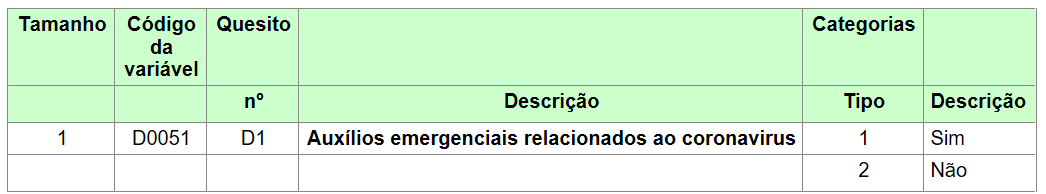

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0051 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0051 IS NOT NULL
                              GROUP BY D00UF51
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0051| count|        percentage|
+-----+------+------------------+
|    1|184767|48.439589133751745|
|    2|196671|51.560410866248255|
+-----+------+------------------+



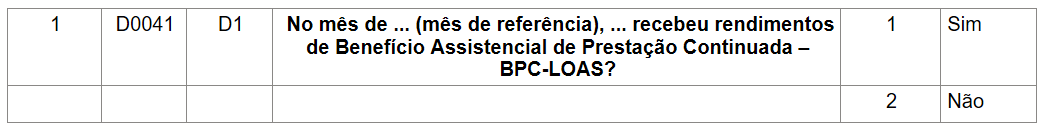

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0041 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0041,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0041 IS NOT NULL
                              GROUP BY D0041
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0041| count|        percentage|
+-----+------+------------------+
|    1| 13793|3.6160529365191723|
|    2|367645| 96.38394706348082|
+-----+------+------------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
bpc_count_by_state = df.filter(df.D0041 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(bpc_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|         1346|3.9197414019045396|
| 28|       8013|          465| 5.803070011231749|
| 26|      17138|          753| 4.393744894386742|
| 27|      11403|          775| 6.796457072700167|
| 12|       6102|          242| 3.965912815470338|
| 22|       8480|          422| 4.976415094339623|
| 13|      10341|          580|   5.6087419011701|
| 16|       2472|          148|5.9870550161812295|
| 15|      11878|          599|5.0429365212998825|
| 17|       5087|          240| 4.717908393945351|
| 23|      16182|          907|  5.60499320232357|
| 25|       9873|          572| 5.793578446267598|
| 24|       7775|          428| 5.504823151125402|
| 29|      17063|          682| 3.996952470257282|
| 21|      20404|          797| 3.906096843756126|
| 32|      15863|          359| 2.263128033789321|
| 11|       6001|          234|

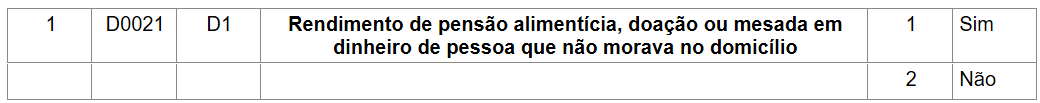

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0021 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0021,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0021 IS NOT NULL
                              GROUP BY D0021
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0021| count|       percentage|
+-----+------+-----------------+
|    1| 19047|4.993472071476885|
|    2|362391|95.00652792852311|
+-----+------+-----------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
rend_ext_count_by_state = df.filter(df.D0021 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(rend_ext_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|         1718| 5.003057747750371|
| 28|       8013|          845|10.545363783851242|
| 26|      17138|          831|  4.84887384759015|
| 27|      11403|          473| 4.148031219854424|
| 12|       6102|          330| 5.408062930186824|
| 22|       8480|          396| 4.669811320754716|
| 13|      10341|          373|3.6070012571318055|
| 16|       2472|          160| 6.472491909385113|
| 15|      11878|          433| 3.645394847617444|
| 17|       5087|          275|5.4059367013957145|
| 23|      16182|          745| 4.603880855271289|
| 25|       9873|          472| 4.780715081535501|
| 24|       7775|          454| 5.839228295819936|
| 29|      17063|         1001| 5.866494754732462|
| 21|      20404|          770| 3.773769849049206|
| 32|      15863|          698|  4.40017651137868|
| 11|       6001|          296|

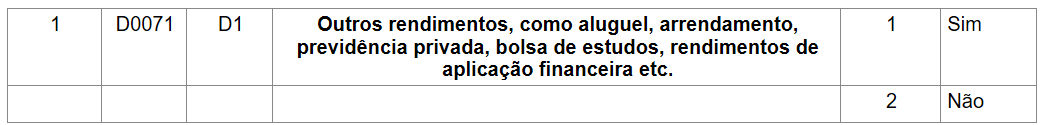

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0071 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0071,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0071 IS NOT NULL
                              GROUP BY D0071
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0071| count|       percentage|
+-----+------+-----------------+
|    1| 18972|4.973809636166298|
|    2|362466| 95.0261903638337|
+-----+------+-----------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
rend_ext_count_by_state = df.filter(df.D0071 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(rend_ext_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|         1878| 5.469000262092664|
| 28|       8013|          259|3.2322475976538123|
| 26|      17138|          596| 3.477652001400397|
| 27|      11403|          287|2.5168815224063845|
| 12|       6102|          170| 2.785971812520485|
| 22|       8480|          272| 3.207547169811321|
| 13|      10341|          240|2.3208587177255584|
| 16|       2472|           91|3.6812297734627832|
| 15|      11878|          458|3.8558679912443177|
| 17|       5087|          207| 4.069195989777865|
| 23|      16182|          533|3.2937832159189226|
| 25|       9873|          384| 3.889395320571255|
| 24|       7775|          380| 4.887459807073955|
| 29|      17063|          523| 3.065111645079998|
| 21|      20404|          317|1.5536169378553224|
| 32|      15863|          842| 5.307949316018408|
| 11|       6001|          255|

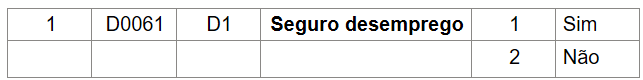

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0061 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0061,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0061 IS NOT NULL
                              GROUP BY D0061
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0061| count|        percentage|
+-----+------+------------------+
|    1|  5206|1.3648351763589366|
|    2|376232| 98.63516482364106|
+-----+------+------------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
seguro_count_by_state = df.filter(df.D0061 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(seguro_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+-------------------+
| UF|total_count|auxilio_count|         Percentage|
+---+-----------+-------------+-------------------+
| 31|      34339|          555|  1.616238096624829|
| 28|       8013|           86|  1.073255959066517|
| 26|      17138|          186| 1.0853075037927413|
| 27|      11403|           47| 0.4121722353766553|
| 12|       6102|           77| 1.2618813503769257|
| 22|       8480|           80| 0.9433962264150944|
| 13|      10341|           93|  0.899332753118654|
| 16|       2472|           32| 1.2944983818770228|
| 15|      11878|           64| 0.5388112476847954|
| 17|       5087|           17|0.33418517790446234|
| 23|      16182|          128| 0.7910023482882216|
| 25|       9873|          100| 1.0128633647320977|
| 24|       7775|           71| 0.9131832797427653|
| 29|      17063|          167| 0.9787258981421789|
| 21|      20404|          167| 0.8184669672613214|
| 32|      15863|          251|  1.582298430309525|
| 11|       

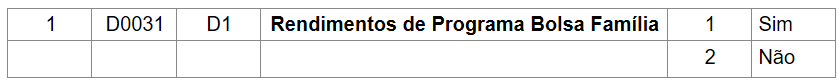

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0031 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0031,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0031 IS NOT NULL
                              GROUP BY D0031
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0031| count|       percentage|
+-----+------+-----------------+
|    1| 36732|9.629874317713496|
|    2|344706| 90.3701256822865|
+-----+------+-----------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
bolsa_familia_count_by_state = df.filter(df.D0031 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(bolsa_familia_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|         2090| 6.086374093596202|
| 28|       8013|         1831|  22.8503681517534|
| 26|      17138|         2998|17.493289765433538|
| 27|      11403|         2258|19.801806542138035|
| 12|       6102|          993|16.273352999016716|
| 22|       8480|          960|11.320754716981133|
| 13|      10341|         1318|12.745382458176191|
| 16|       2472|           60|2.4271844660194173|
| 15|      11878|         1588|13.369254083178985|
| 17|       5087|          387|7.6076272852368785|
| 23|      16182|         2235|13.811642565813868|
| 25|       9873|         2172|21.999392281981162|
| 24|       7775|          848|10.906752411575562|
| 29|      17063|         3928|23.020570825763347|
| 21|      20404|         4872| 23.87767104489316|
| 32|      15863|          629| 3.965202042488811|
| 11|       6001|          395|

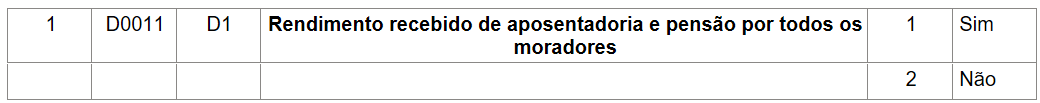

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0011 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0011,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0011 IS NOT NULL
                              GROUP BY D0011
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0011| count|       percentage|
+-----+------+-----------------+
|    1|131315|34.42630257079787|
|    2|250123|65.57369742920213|
+-----+------+-----------------+



In [ ]:
total_count_by_state = df.groupBy("UF").count().withColumnRenamed("count", "total_count")

# Contando o número de registros que receberam o auxílio por estado
pensao_count_by_state = df.filter(df.D0011 == 1).groupBy("UF").count().withColumnRenamed("count", "auxilio_count")

# Juntando os dois DataFrames com base na coluna 'UF'
merged_df = total_count_by_state.join(pensao_count_by_state, "UF", "inner")

# Calculando a porcentagem
merged_df = merged_df.withColumn("Percentage", (F.col("auxilio_count") / F.col("total_count")) * 100)

# Mostrando o DataFrame com a porcentagem calculada
merged_df.show()

+---+-----------+-------------+------------------+
| UF|total_count|auxilio_count|        Percentage|
+---+-----------+-------------+------------------+
| 31|      34339|        12918| 37.61903375171089|
| 28|       8013|         2486|31.024585049294895|
| 26|      17138|         5263| 30.70953436807095|
| 27|      11403|         3852| 33.78058405682715|
| 12|       6102|         1833|30.039331366764994|
| 22|       8480|         3081| 36.33254716981132|
| 13|      10341|         2558|24.736485833091574|
| 16|       2472|          441| 17.83980582524272|
| 15|      11878|         3019|25.416736824381207|
| 17|       5087|         1518|29.840770591704345|
| 23|      16182|         5810| 35.90409096527005|
| 25|       9873|         3414|34.579155271953816|
| 24|       7775|         2952|37.967845659163984|
| 29|      17063|         5576|32.678895856531675|
| 21|      20404|         6632|32.503430699862776|
| 32|      15863|         5066|31.935951585450418|
| 11|       6001|         1904|

## Intersecção

In [ ]:
# Calcula o total de registros onde D0011 e D0051 não são nulos
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']

# Consulta para obter a porcentagem, considerando que D0011 e D0051 sejam ambos 1 ou ambos 2
percentage_query = spark.sql('''
                              SELECT D0011, D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad
                              WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                                AND ((D0011 = 1 AND D0051 = 1) OR (D0011 = 2 AND D0051 = 2))
                              GROUP BY D0011, D0051
                              ORDER BY D0011, D0051
                              '''.format(total_count))

percentage_query.show()

+-----+-----+------+------------------+
|D0011|D0051| count|        percentage|
+-----+-----+------+------------------+
|    1|    1| 44530|11.674243258406348|
|    2|    2|109886| 28.80835155385672|
+-----+-----+------+------------------+



### Análise auxilios governamentais

In [ ]:
total_count_1 = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        ''').collect()[0]['total']

query_1 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad
                    WHERE D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    '''.format(total_count))
query_1.show()

+-----+------------------+
|count|        percentage|
+-----+------------------+
|  963|0.2524656693879477|
+-----+------------------+



In [ ]:
query_1 = spark.sql(f'''
                    SELECT D0051, D0041, D0031, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad
                    WHERE D0051 IS NOT NULL AND D0041 IS NOT NULL AND D0031 IS NOT NULL
                    GROUP BY D0051, D0041, D0031
                    HAVING D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    ''')
query_1.show()

+-----+-----+-----+-----+------------------+
|D0051|D0041|D0031|count|        percentage|
+-----+-----+-----+-----+------------------+
|    1|    1|    1|  963|0.2524656693879477|
+-----+-----+-----+-----+------------------+



### Rendimentos diversificados

In [ ]:
total_count_2 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad
                         WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                         ''').collect()[0]['total']

query_2 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad
                    WHERE D0071 = 1 AND D0021 = 1
                    '''.format(total_count_2))
query_2.show()

+-----+-------------------+
|count|         percentage|
+-----+-------------------+
|  918|0.24066820820159504|
+-----+-------------------+



In [ ]:
query_2 = spark.sql(f'''
                    SELECT D0071, D0021, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad
                    WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                    GROUP BY D0071, D0021
                    HAVING D0071 = 1 AND D0021 = 1
                    ''')
query_2.show()

+-----+-----+-----+-------------------+
|D0071|D0021|count|         percentage|
+-----+-----+-----+-------------------+
|    1|    1|  918|0.24066820820159504|
+-----+-----+-----+-------------------+



###Rendimentos emergencia

In [ ]:
total_count_3 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad
                         WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                         ''').collect()[0]['total']

query_3 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad
                    WHERE D0051 = 1 AND D0061 = 1
                    '''.format(total_count_3))
query_3.show()

+-----+------------------+
|count|        percentage|
+-----+------------------+
| 1955|0.5125341470959893|
+-----+------------------+



In [ ]:
query_3 = spark.sql(f'''
                    SELECT D0051, D0061, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad
                    WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                    GROUP BY D0051, D0061
                    HAVING D0051 = 1 AND D0061 = 1
                    ''')
query_3.show()

+-----+-----+-----+------------------+
|D0051|D0061|count|        percentage|
+-----+-----+-----+------------------+
|    1|    1| 1955|0.5125341470959893|
+-----+-----+-----+------------------+



#Importando data - Mes 10

In [ ]:
df10 = spark.read.csv("PNAD_COVID_102020 - Recorte.csv",sep =";", inferSchema= True, header = True)
df10.count()

380461

In [ ]:
df10.createOrReplaceTempView("pnad10")



pnad10 = spark.sql(''' SELECT * FROM pnad10 WHERE  ''')
pnad10.show()

+----+---+-------+-------+-------+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
| Ano| UF|CAPITAL|RM_RIDE|M�s_ref|B0011|B0012|B0014|B002|B0031|B0033|B0042|B005|C001|C002|C013|C014|C015|C016|D0011|D0021|D0031|D0041|D0051|D0061|D0071|
+----+---+-------+-------+-------+-----+-----+-----+----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
|2020| 11|     11|   NULL|     10|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|   1|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|     10|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|   1|NULL|NULL|   2|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|     10|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|     10|    2|    2|    2|NULL| NULL| NULL| NULL|NULL|NU

##Consultas avançadas

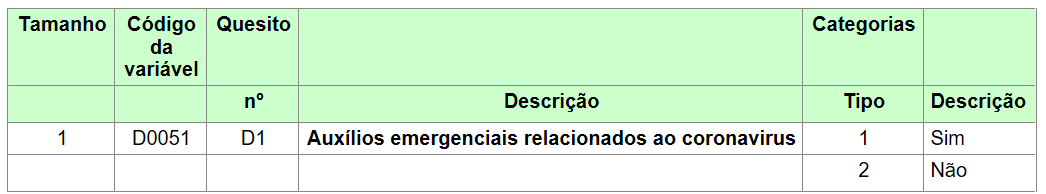

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0051 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0051 IS NOT NULL
                              GROUP BY D0051
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0051| count|        percentage|
+-----+------+------------------+
|    1|189681|49.855569953293504|
|    2|190780|  50.1444300467065|
+-----+------+------------------+



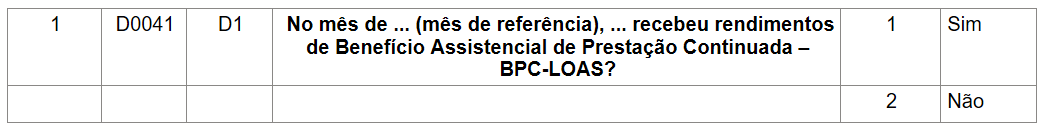

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0041 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0041,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0041 IS NOT NULL
                              GROUP BY D0041
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0041| count|        percentage|
+-----+------+------------------+
|    1| 13894|3.6518854757780694|
|    2|366567| 96.34811452422193|
+-----+------+------------------+



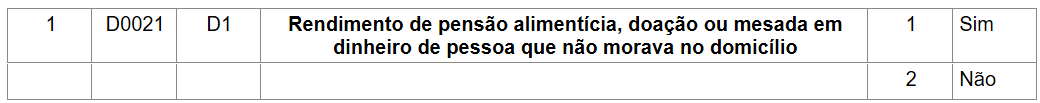

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0021 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0021,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0021 IS NOT NULL
                              GROUP BY D0021
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0021| count|       percentage|
+-----+------+-----------------+
|    1| 18760|4.930860193291823|
|    2|361701|95.06913980670818|
+-----+------+-----------------+



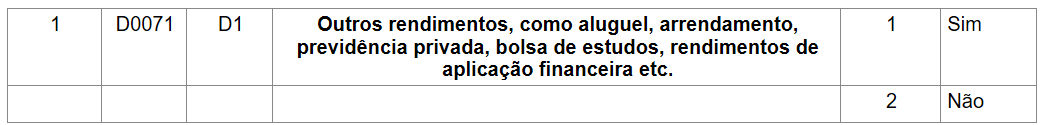

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0071 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0071,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0071 IS NOT NULL
                              GROUP BY D0071
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0071| count|       percentage|
+-----+------+-----------------+
|    1| 18785|4.937431169029152|
|    2|361676|95.06256883097085|
+-----+------+-----------------+



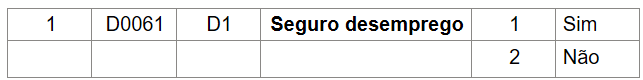

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0061 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0061,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0061 IS NOT NULL
                              GROUP BY D0061
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0061| count|       percentage|
+-----+------+-----------------+
|    1|  6262|1.645898002686215|
|    2|374199|98.35410199731378|
+-----+------+-----------------+



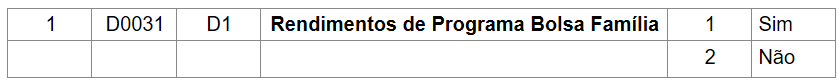

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0031 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0031,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0031 IS NOT NULL
                              GROUP BY D0031
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0031| count|       percentage|
+-----+------+-----------------+
|    1| 32504|8.543319814645917|
|    2|347957|91.45668018535409|
+-----+------+-----------------+



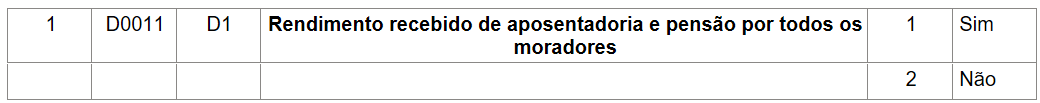

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0011 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0011,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0011 IS NOT NULL
                              GROUP BY D0011
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0011| count|       percentage|
+-----+------+-----------------+
|    1|130855|34.39380120432843|
|    2|249606|65.60619879567156|
+-----+------+-----------------+



## Intersecção

In [ ]:
# Calcula o total de registros onde D0011 e D0051 não são nulos
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']

# Consulta para obter a porcentagem, considerando que D0011 e D0051 sejam ambos 1 ou ambos 2
percentage_query = spark.sql('''
                              SELECT D0011, D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                                AND ((D0011 = 1 AND D0051 = 1) OR (D0011 = 2 AND D0051 = 2))
                              GROUP BY D0011, D0051
                              ORDER BY D0011, D0051
                              '''.format(total_count))

percentage_query.show()

+-----+-----+------+------------------+
|D0011|D0051| count|        percentage|
+-----+-----+------+------------------+
|    1|    1| 45811|12.040918780111497|
|    2|    2|105736| 27.79154762248956|
+-----+-----+------+------------------+



### Análise auxilios governamentais

In [ ]:
total_count_1 = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        ''').collect()[0]['total']

query_1 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad10
                    WHERE D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    '''.format(total_count))
query_1.show()

+-----+------------------+
|count|        percentage|
+-----+------------------+
|  822|0.2160536822433837|
+-----+------------------+



In [ ]:
query_1 = spark.sql(f'''
                    SELECT D0051, D0041, D0031, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad10
                    WHERE D0051 IS NOT NULL AND D0041 IS NOT NULL AND D0031 IS NOT NULL
                    GROUP BY D0051, D0041, D0031
                    HAVING D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    ''')
query_1.show()

+-----+-----+-----+-----+------------------+
|D0051|D0041|D0031|count|        percentage|
+-----+-----+-----+-----+------------------+
|    1|    1|    1|  822|0.2160536822433837|
+-----+-----+-----+-----+------------------+



### Rendimentos diversificados

In [ ]:
total_count_2 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad10
                         WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                         ''').collect()[0]['total']

query_2 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad10
                    WHERE D0071 = 1 AND D0021 = 1
                    '''.format(total_count_2))
query_2.show()

+-----+-------------------+
|count|         percentage|
+-----+-------------------+
|  908|0.23865783877979607|
+-----+-------------------+



In [ ]:
query_2 = spark.sql(f'''
                    SELECT D0071, D0021, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad10
                    WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                    GROUP BY D0071, D0021
                    HAVING D0071 = 1 AND D0021 = 1
                    ''')
query_2.show()

+-----+-----+-----+-------------------+
|D0071|D0021|count|         percentage|
+-----+-----+-----+-------------------+
|    1|    1|  908|0.23865783877979607|
+-----+-----+-----+-------------------+



###Rendimentos emergencia

In [ ]:
total_count_3 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad10
                         WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                         ''').collect()[0]['total']

query_3 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad10
                    WHERE D0051 = 1 AND D0061 = 1
                    '''.format(total_count_3))
query_3.show()

+-----+------------------+
|count|        percentage|
+-----+------------------+
| 2386|0.6271339243706976|
+-----+------------------+



In [ ]:
query_3 = spark.sql(f'''
                    SELECT D0051, D0061, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad
                    WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                    GROUP BY D0051, D0061
                    HAVING D0051 = 1 AND D0061 = 1
                    ''')
query_3.show()

+-----+-----+-----+------------------+
|D0051|D0061|count|        percentage|
+-----+-----+-----+------------------+
|    1|    1| 1955|0.5125341470959893|
+-----+-----+-----+------------------+



In [ ]:
# Calcula o total de registros onde D0011 e D0051 não são nulos
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad10
                        WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']

# Consulta para obter a porcentagem, considerando que D0011 e D0051 sejam ambos 1 ou ambos 2
percentage_query = spark.sql('''
                              SELECT D0011, D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad10
                              WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                                AND ((D0011 = 1 AND D0051 = 1) OR (D0011 = 2 AND D0051 = 2))
                              GROUP BY D0011, D0051
                              ORDER BY D0011, D0051
                              '''.format(total_count))

percentage_query.show()

+-----+-----+------+------------------+
|D0011|D0051| count|        percentage|
+-----+-----+------+------------------+
|    1|    1| 45811|12.040918780111497|
|    2|    2|105736| 27.79154762248956|
+-----+-----+------+------------------+



#Importando data - Mes 5

In [ ]:
df5 = spark.read.csv("PNAD_COVID_052020 - Recorte.csv",sep =";", inferSchema= True, header = True)
df5.count()

349306

In [ ]:
df5.createOrReplaceTempView("pnad5")



pnad5 = spark.sql(''' SELECT * FROM pnad5 WHERE  ''')
pnad5.show()

+----+---+-------+-------+-------+-----+-----+-----+----+-----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
| Ano| UF|CAPITAL|RM_RIDE|Mes_ref|B0011|B0012|B0014|B002|B0031|B0032|B0033|B0042|B005|C001|C002|C013|C014|C015|C016|D0011|D0021|D0031|D0041|D0051|D0061|D0071|
+----+---+-------+-------+-------+-----+-----+-----+----+-----+-----+-----+-----+----+----+----+----+----+----+----+-----+-----+-----+-----+-----+-----+-----+
|2020| 11|     11|   NULL|      5|    1|    1|    2|   2|    2|    2|    1| NULL|NULL|   1|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|      5|    1|    1|    2|   2|    2|    2|    2| NULL|NULL|   1|NULL|   1|   2|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|      5|    2|    2|    2|NULL| NULL| NULL| NULL| NULL|NULL|NULL|NULL|NULL|NULL|NULL|NULL|    2|    2|    2|    2|    1|    2|    2|
|2020| 11|     11|   NULL|      5|    2|    2|

#Consultas avançadas

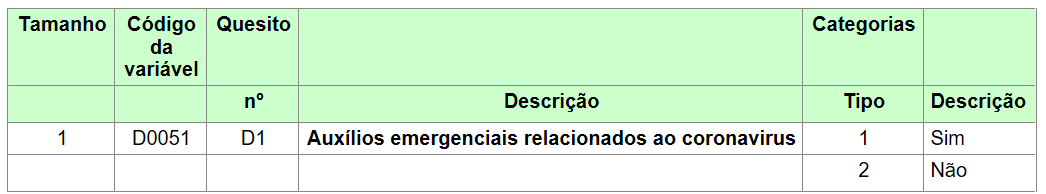

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0051 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0051 IS NOT NULL
                              GROUP BY D0051
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0051| count|       percentage|
+-----+------+-----------------+
|    1|160870|46.05417599468661|
|    2|188436|53.94582400531339|
+-----+------+-----------------+



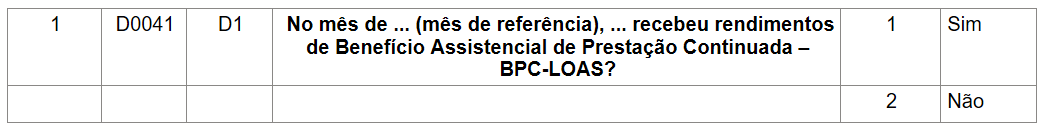

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0041 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0041,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0041 IS NOT NULL
                              GROUP BY D0041
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0041| count|        percentage|
+-----+------+------------------+
|    1| 10910|3.1233359862126617|
|    2|338396| 96.87666401378733|
+-----+------+------------------+



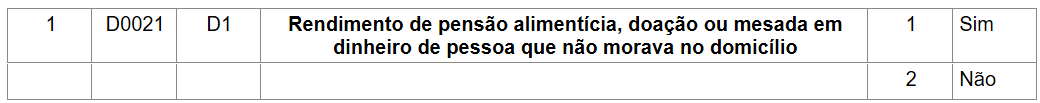

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0021 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0021,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0021 IS NOT NULL
                              GROUP BY D0021
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0021| count|       percentage|
+-----+------+-----------------+
|    1| 17373|4.973576176761922|
|    2|331933|95.02642382323808|
+-----+------+-----------------+



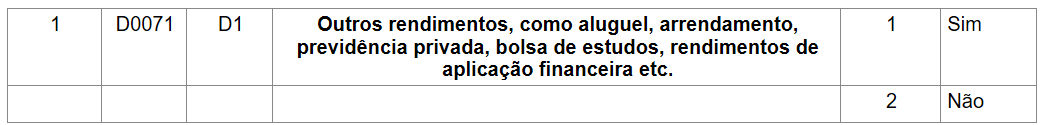

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0071 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0071,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0071 IS NOT NULL
                              GROUP BY D0071
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0071| count|       percentage|
+-----+------+-----------------+
|    1| 15981|4.575071713626448|
|    2|333325|95.42492828637356|
+-----+------+-----------------+



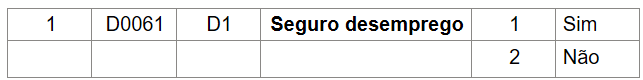

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0061 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0061,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0061 IS NOT NULL
                              GROUP BY D0061
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0061| count|        percentage|
+-----+------+------------------+
|    1|  7453|2.1336593130378523|
|    2|341853| 97.86634068696215|
+-----+------+------------------+



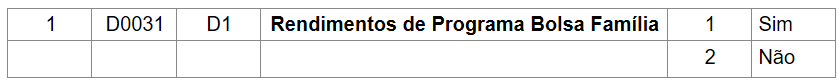

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0031 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0031,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0031 IS NOT NULL
                              GROUP BY D0031
                              '''.format(total_count))

percentage_query.show()

+-----+------+------------------+
|D0031| count|        percentage|
+-----+------+------------------+
|    1| 45188|12.936508390923718|
|    2|304118| 87.06349160907628|
+-----+------+------------------+



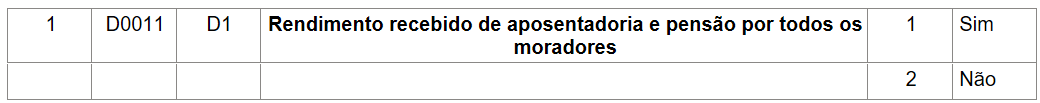

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0011 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql('''
                              SELECT D0011,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0011 IS NOT NULL
                              GROUP BY D0011
                              '''.format(total_count))

percentage_query.show()

+-----+------+-----------------+
|D0011| count|       percentage|
+-----+------+-----------------+
|    1|118821|34.01630661941106|
|    2|230485|65.98369338058893|
+-----+------+-----------------+



# Intersecção

In [ ]:
# Calcula o total de registros onde D0011 e D0051 não são nulos
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']

# Consulta para obter a porcentagem, considerando que D0011 e D0051 sejam ambos 1 ou ambos 2
percentage_query = spark.sql('''
                              SELECT D0011, D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                                AND ((D0011 = 1 AND D0051 = 1) OR (D0011 = 2 AND D0051 = 2))
                              GROUP BY D0011, D0051
                              ORDER BY D0011, D0051
                              '''.format(total_count))

percentage_query.show()

+-----+-----+------+------------------+
|D0011|D0051| count|        percentage|
+-----+-----+------+------------------+
|    1|    1| 39004|11.166140862166696|
|    2|    2|108619| 31.09565824806903|
+-----+-----+------+------------------+



# Análise auxilios governamentais

In [ ]:
total_count_1 = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        ''').collect()[0]['total']

query_1 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad5
                    WHERE D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    '''.format(total_count))
query_1.show()

+-----+-------------------+
|count|         percentage|
+-----+-------------------+
|  921|0.26366566849696255|
+-----+-------------------+



In [ ]:
query_1 = spark.sql(f'''
                    SELECT D0051, D0041, D0031, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad5
                    WHERE D0051 IS NOT NULL AND D0041 IS NOT NULL AND D0031 IS NOT NULL
                    GROUP BY D0051, D0041, D0031
                    HAVING D0051 = 1 AND D0041 = 1 AND D0031 = 1
                    ''')
query_1.show()

+-----+-----+-----+-----+-------------------+
|D0051|D0041|D0031|count|         percentage|
+-----+-----+-----+-----+-------------------+
|    1|    1|    1|  921|0.26366566849696255|
+-----+-----+-----+-----+-------------------+



# Rendimentos diversificados

In [ ]:
total_count_2 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad5
                         WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                         ''').collect()[0]['total']

query_2 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad5
                    WHERE D0071 = 1 AND D0021 = 1
                    '''.format(total_count_2))
query_2.show()

+-----+-------------------+
|count|         percentage|
+-----+-------------------+
|  790|0.22616273410705798|
+-----+-------------------+



In [ ]:
query_2 = spark.sql(f'''
                    SELECT D0071, D0021, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad5
                    WHERE D0071 IS NOT NULL AND D0021 IS NOT NULL
                    GROUP BY D0071, D0021
                    HAVING D0071 = 1 AND D0021 = 1
                    ''')
query_2.show()

+-----+-----+-----+-------------------+
|D0071|D0021|count|         percentage|
+-----+-----+-----+-------------------+
|    1|    1|  790|0.22616273410705798|
+-----+-----+-----+-------------------+



#Rendimentos emergencia

In [ ]:
total_count_3 = spark.sql('''
                         SELECT count(*) as total
                         FROM pnad5
                         WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                         ''').collect()[0]['total']

query_3 = spark.sql('''
                    SELECT count(*) as count,
                           (count(*) / {} * 100) as percentage
                    FROM pnad5
                    WHERE D0051 = 1 AND D0061 = 1
                    '''.format(total_count_3))
query_3.show()

+-----+------------------+
|count|        percentage|
+-----+------------------+
| 2974|0.8514024952334057|
+-----+------------------+



In [ ]:
query_3 = spark.sql(f'''
                    SELECT D0051, D0061, count(*) as count,
                           (count(*) / {total_count} * 100) as percentage
                    FROM pnad5
                    WHERE D0051 IS NOT NULL AND D0061 IS NOT NULL
                    GROUP BY D0051, D0061
                    HAVING D0051 = 1 AND D0061 = 1
                    ''')
query_3.show()

+-----+-----+-----+------------------+
|D0051|D0061|count|        percentage|
+-----+-----+-----+------------------+
|    1|    1| 2974|0.8514024952334057|
+-----+-----+-----+------------------+



In [ ]:
# Calcula o total de registros onde D0011 e D0051 não são nulos
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad5
                        WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']

# Consulta para obter a porcentagem, considerando que D0011 e D0051 sejam ambos 1 ou ambos 2
percentage_query = spark.sql('''
                              SELECT D0011, D0051,
                                     count(*) as count,
                                     (count(*) / {} * 100) as percentage
                              FROM pnad5
                              WHERE D0011 IS NOT NULL AND D0051 IS NOT NULL
                                AND ((D0011 = 1 AND D0051 = 1) OR (D0011 = 2 AND D0051 = 2))
                              GROUP BY D0011, D0051
                              ORDER BY D0011, D0051
                              '''.format(total_count))

percentage_query.show()

+-----+-----+------+------------------+
|D0011|D0051| count|        percentage|
+-----+-----+------+------------------+
|    1|    1| 45811|12.040918780111497|
|    2|    2|105736| 27.79154762248956|
+-----+-----+------+------------------+



#Intersecção tudo

In [ ]:
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0011 IS NOT NULL AND D0031 IS NOT NULL AND D0061 IS NOT NULL AND D0071 IS NOT NULL AND D0021 IS NOT NULL AND D0041 IS NOT NULL AND D0051 IS NOT NULL
                        ''').collect()[0]['total']


percentage_query = spark.sql(f'''
                              SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051,
                                     count(*) as count,
                                     (count(*) / {total_count} * 100) as percentage
                              FROM pnad
                              WHERE D0011 IS NOT NULL AND D0031 IS NOT NULL AND D0061 IS NOT NULL AND D0071 IS NOT NULL AND D0021 IS NOT NULL AND D0041 IS NOT NULL AND D0051 IS NOT NULL
                              GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                              ORDER BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                              ''')

percentage_query.show()

+-----+-----+-----+-----+-----+-----+-----+-----+--------------------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|          percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+--------------------+
|    1|    1|    1|    2|    2|    2|    1|   28|0.007340642515952789|
|    1|    1|    1|    2|    2|    2|    2|   28|0.007340642515952789|
|    1|    1|    2|    1|    1|    2|    1|    4|0.001048663216564...|
|    1|    1|    2|    1|    2|    2|    1|   58| 0.01520561664018792|
|    1|    1|    2|    1|    2|    2|    2|   35|0.009175803144940986|
|    1|    1|    2|    2|    1|    1|    2|    5|0.001310829020705...|
|    1|    1|    2|    2|    1|    2|    1|  284| 0.07445508837609258|
|    1|    1|    2|    2|    1|    2|    2|   85| 0.02228409335199954|
|    1|    1|    2|    2|    2|    1|    1|  193|0.050598000199246006|
|    1|    1|    2|    2|    2|    1|    2|   35|0.009175803144940986|
|    1|    1|    2|    2|    2|    2|    1| 3917|   1.026903454820967|
|    1

In [ ]:
# Primeira consulta para obter a contagem total de registros onde D0011 IS NOT NULL
total_count = spark.sql('''
                        SELECT count(*) as total
                        FROM pnad
                        WHERE D0011 IS NOT NULL
                        ''').collect()[0]['total']

# Segunda consulta para obter os percentuais
percentage_query = spark.sql(f'''
                              SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051,
                                     count(*) as count,
                                     (count(*) / {total_count} * 100) as percentage
                              FROM pnad
                              WHERE D0011 = 1 AND D0031 = 1 AND D0061 = 1 AND D0071 = 1 AND D0021 = 1 AND D0041 = 1 AND D0051 = 1
                              GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                              ''')

# Mostrar os resultados
percentage_query.show()

+-----+-----+-----+-----+-----+-----+-----+-----+----------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+----------+
+-----+-----+-----+-----+-----+-----+-----+-----+----------+



In [ ]:
filtered_query = spark.sql('''
                          SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051, count(*) as count,
                                 (count(*) / {} * 100) as percentage
                          FROM pnad
                          WHERE D0011 = 1 AND D0031 = 1 AND D0061 = 1 AND D0071 = 1 AND D0021 = 1 AND D0041 = 1 AND D0051 = 1
                          GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                          '''.format(total_count))

filtered_query.show()


+-----+-----+-----+-----+-----+-----+-----+-----+----------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+----------+
+-----+-----+-----+-----+-----+-----+-----+-----+----------+



In [ ]:
filtered_query = spark.sql('''
                          SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051, count(*) as count,
                                 (count(*) / {} * 100) as percentage
                          FROM pnad
                          WHERE
                          (D0011 = 1 AND D0031 = 1 AND D0061 = 1 AND D0071 = 1 AND D0021 = 1 AND D0041 = 1 AND D0051 = 1)
                          OR
                          (D0011 = 2 AND D0031 = 2 AND D0061 = 2 AND D0071 = 2 AND D0021 = 2 AND D0041 = 2 AND D0051 = 2)
                          GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                          '''.format(total_count))

filtered_query.show()

+-----+-----+-----+-----+-----+-----+-----+-----+------------------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|        percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+------------------+
|    2|    2|    2|    2|    2|    2|    2|87627|22.972802919478394|
+-----+-----+-----+-----+-----+-----+-----+-----+------------------+



In [ ]:
filtered_query = spark.sql('''
                          SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051, count(*) as count,
                                 (count(*) / {} * 100) as percentage
                          FROM pnad
                          WHERE D0011 = 1 AND D0031 = 1 AND D0061 = 1 AND D0071 = 1 AND D0021 = 1 AND D0041 = 1 AND D0051 = 1
                          GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                          '''.format(total_count))

filtered_query.show()

+-----+-----+-----+-----+-----+-----+-----+-----+----------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+----------+
+-----+-----+-----+-----+-----+-----+-----+-----+----------+



In [ ]:
filtered_query = spark.sql('''
                          SELECT D0011, D0031, D0061, D0071, D0021, D0041, D0051, count(*) as count,
                                 (count(*) / {} * 100) as percentage
                          FROM pnad
                          WHERE D0011 = 1 AND D0031 = 1 AND D0061 = 1 AND D0071 = 1 AND D0021 = 1 AND D0041 = 1 AND D0051 = 1
                          GROUP BY D0011, D0031, D0061, D0071, D0021, D0041, D0051
                          '''.format(total_count))

filtered_query.show()

+-----+-----+-----+-----+-----+-----+-----+-----+----------+
|D0011|D0031|D0061|D0071|D0021|D0041|D0051|count|percentage|
+-----+-----+-----+-----+-----+-----+-----+-----+----------+
+-----+-----+-----+-----+-----+-----+-----+-----+----------+



In [ ]:
print(pnad.dtypes)


[('Ano', 'int'), ('UF', 'int'), ('CAPITAL', 'int'), ('RM_RIDE', 'int'), ('B0011', 'int'), ('B0012', 'int'), ('B0014', 'int'), ('B002', 'int'), ('B0031', 'int'), ('B0033', 'int'), ('B0042', 'int'), ('B005', 'int'), ('C001', 'int'), ('C002', 'int'), ('C013', 'int'), ('C014', 'int'), ('C015', 'int'), ('C016', 'int'), ('D0011', 'int'), ('D0021', 'int'), ('D0031', 'int'), ('D0041', 'int'), ('D0051', 'int'), ('D0061', 'int'), ('D0071', 'int')]


In [ ]:
pnad =spark.sql('''\
                  SELECT *
                  FROM cereal
                  ''')
cereal.show()

+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|                name|mfr|type|calories|protein|fat|sodium|fiber|carbo|sugars|potass|vitamins|shelf|weight|cups|   rating|
+--------------------+---+----+--------+-------+---+------+-----+-----+------+------+--------+-----+------+----+---------+
|Apple Cinnamon Ch...|  G|   C|     110|      2|  2|   180|  1.5| 10.5|    10|    70|      25|    1|   1.0|0.75|29.509541|
|             Basic 4|  G|   C|     130|      3|  2|   210|  2.0| 18.0|     8|   100|      25|    3|  1.33|0.75|37.038562|
|            Cheerios|  G|   C|     110|      6|  2|   290|  2.0| 17.0|     1|   105|      25|    1|   1.0|1.25|50.764999|
|Cinnamon Toast Cr...|  G|   C|     120|      1|  3|   210|  0.0| 13.0|     9|    45|      25|    2|   1.0|0.75|19.823573|
|            Clusters|  G|   C|     110|      3|  2|   140|  2.0| 13.0|     7|   105|      25|    3|   1.0| 0.5|40.400208|
|         Cocoa 

In [ ]:
pnad =spark.sql('''
                  SELECT mfr,
                         type,
                         sum(calories) as sum_calories,
                         max(calories) as min_calories,
                         min(calories) as max_calories,
                         avg(calories) as avg_calories,
                         count(distinct name) as distinct_name_count,
                         count(name) as name_count
                  FROM cereal
                  GROUP BY  mfr, type
                  ORDER BY mfr, type
                  ''')
pnad.show()

+---+----+------------+------------+------------+------------------+-------------------+----------+
|mfr|type|sum_calories|min_calories|max_calories|      avg_calories|distinct_name_count|name_count|
+---+----+------------+------------+------------+------------------+-------------------+----------+
|  A|   H|         100|         100|         100|             100.0|                  1|         1|
|  G|   C|        2450|         140|         100|111.36363636363636|                 22|        22|
|  K|   C|        2500|         160|          50|108.69565217391305|                 23|        23|
|  N|   C|         420|          90|          70|              84.0|                  5|         5|
|  N|   H|         100|         100|         100|             100.0|                  1|         1|
|  P|   C|         980|         120|          90|108.88888888888889|                  9|         9|
|  Q|   C|         660|         120|          50| 94.28571428571429|                  7|         7|


In [ ]:
cereal.show()

+---+----+------------+------------+------------+------------------+-------------------+----------+
|mfr|type|sum_calories|min_calories|max_calories|      avg_calories|distinct_name_count|name_count|
+---+----+------------+------------+------------+------------------+-------------------+----------+
|  A|   H|         100|         100|         100|             100.0|                  1|         1|
|  G|   C|        2450|         140|         100|111.36363636363636|                 22|        22|
|  K|   C|        2500|         160|          50|108.69565217391305|                 23|        23|
|  N|   C|         420|          90|          70|              84.0|                  5|         5|
|  N|   H|         100|         100|         100|             100.0|                  1|         1|
|  P|   C|         980|         120|          90|108.88888888888889|                  9|         9|
|  Q|   C|         660|         120|          50| 94.28571428571429|                  7|         7|


In [ ]:
cereal =spark.sql('''
                  SELECT mfr,
                         type,
                         sum(calories) as sum_calories,
                         max(calories) as min_calories,
                         min(calories) as max_calories,
                         avg(calories) as avg_calories,


                         sum(carbo) as sum_carbo,
                         max(carbo) as min_carbo,
                         min(carbo) as max_carbo,
                         avg(carbo) as avg_carbo,

                         sum(vitamins) as sum_vitamins,
                         max(vitamins) as min_vitamins,
                         min(vitamins) as max_vitamins,
                         avg(vitamins) as avg_vitamins,
                         count(distinct name) as distinct_name_count,
                         count(name) as name_count


                  FROM cereal
                  GROUP BY  mfr, type
                  ORDER BY mfr, type
                  ''')
cereal.show()

+---+----+------------+------------+------------+------------------+---------+---------+---------+------------------+------------+------------+------------+------------------+-------------------+----------+
|mfr|type|sum_calories|min_calories|max_calories|      avg_calories|sum_carbo|min_carbo|max_carbo|         avg_carbo|sum_vitamins|min_vitamins|max_vitamins|      avg_vitamins|distinct_name_count|name_count|
+---+----+------------+------------+------------+------------------+---------+---------+---------+------------------+------------+------------+------------+------------------+-------------------+----------+
|  A|   H|         100|         100|         100|             100.0|     16.0|     16.0|     16.0|              16.0|          25|          25|          25|              25.0|                  1|         1|
|  G|   C|        2450|         140|         100|111.36363636363636|    324.0|     21.0|     10.5|14.727272727272727|         775|         100|          25| 35.227272727272

In [ ]:
cereal =spark.sql('''
                  SELECT mfr,
                         type,

                         sum(calories) as sum_calories,
                         max(calories) as min_calories,
                         min(calories) as max_calories,
                         cast(avg(calories) as decimal(10,2)) as avg_calories,


                         sum(carbo) as sum_carbo,
                         max(carbo) as min_carbo,
                         min(carbo) as max_carbo,
                         cast(avg(carbo) as decimal(10,2)) as avg_carbo,

                         sum(vitamins) as sum_vitamins,
                         max(vitamins) as min_vitamins,
                         min(vitamins) as max_vitamins,
                         cast(avg(vitamins) as decimal(10,2)) as avg_vitamins,
                         count(distinct name) as distinct_name_count,
                         count(name) as name_count


                  FROM cereal
                  GROUP BY  mfr, type
                  ORDER BY mfr, type
                  ''')
cereal.show()

+---+----+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+-------------------+----------+
|mfr|type|sum_calories|min_calories|max_calories|avg_calories|sum_carbo|min_carbo|max_carbo|avg_carbo|sum_vitamins|min_vitamins|max_vitamins|avg_vitamins|distinct_name_count|name_count|
+---+----+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+-------------------+----------+
|  A|   H|         100|         100|         100|      100.00|     16.0|     16.0|     16.0|    16.00|          25|          25|          25|       25.00|                  1|         1|
|  G|   C|        2450|         140|         100|      111.36|    324.0|     21.0|     10.5|    14.73|         775|         100|          25|       35.23|                 22|        22|
|  K|   C|        2500|         160|          50|      108.70|    348.

In [ ]:
cereal =spark.sql('''
                  SELECT mfr,
                         type,

                         (CASE
                              WHEN mfr ='A' THEN 'Abacaxi'
                              WHEN mfr ='G' THEN 'Goiaba'
                              WHEN mfr ='K' THEN 'Banana'
                              WHEN mfr ='N' THEN 'Maca'
                              WHEN mfr ='P' THEN 'Tomaate'
                              WHEN mfr ='Q' THEN 'Pera'
                              WHEN mfr ='R' THEN 'Uva'
                              else 'NA'

                         END) as type_fruit,

                         sum(calories) as sum_calories,
                         max(calories) as min_calories,
                         min(calories) as max_calories,
                         cast(avg(calories) as decimal(10,2)) as avg_calories,


                         sum(carbo) as sum_carbo,
                         max(carbo) as min_carbo,
                         min(carbo) as max_carbo,
                         cast(avg(carbo) as decimal(10,2)) as avg_carbo,

                         sum(vitamins) as sum_vitamins,
                         max(vitamins) as min_vitamins,
                         min(vitamins) as max_vitamins,
                         cast(avg(vitamins) as decimal(10,2)) as avg_vitamins,
                         count(distinct name) as distinct_name_count,
                         count(name) as name_count


                  FROM cereal
                  GROUP BY  mfr, type
                  ORDER BY mfr, type
                  ''')
cereal.show()

+---+----+----------+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+-------------------+----------+
|mfr|type|type_fruit|sum_calories|min_calories|max_calories|avg_calories|sum_carbo|min_carbo|max_carbo|avg_carbo|sum_vitamins|min_vitamins|max_vitamins|avg_vitamins|distinct_name_count|name_count|
+---+----+----------+------------+------------+------------+------------+---------+---------+---------+---------+------------+------------+------------+------------+-------------------+----------+
|  A|   H|   Abacaxi|         100|         100|         100|      100.00|     16.0|     16.0|     16.0|    16.00|          25|          25|          25|       25.00|                  1|         1|
|  G|   C|    Goiaba|        2450|         140|         100|      111.36|    324.0|     21.0|     10.5|    14.73|         775|         100|          25|       35.23|                 22|        22|
|  K|   C|    B

# Joins

##INNER JOIN

In [ ]:
sales = spark.read.csv("sales_data_sample.csv",sep =",", inferSchema= True, header = True)

In [ ]:
sales.show()

In [ ]:
sales.printSchema()

In [ ]:
sales.createOrReplaceTempView("sales")

In [ ]:
data = spark.sql('''
                 SELECT *
                 FROM sales
                  ''')
data.show()

In [ ]:
calendar = spark.sql('''
                 SELECT DISTINCT orderdate, qtr_id, month_id, year_id
                 FROM sales
                 ORDER BY orderdate
                  ''')
calendar.show()
calendar.createOrReplaceTempView("calendar")

In [ ]:
sales_data = spark.sql('''
                 SELECT DISTINCT ordernumber,
                                 customername,
                                 quantityordered,
                                 product_code,
                                 orderlinenumber,
                                 priceeach
                 FROM sales
                 ORDER BY ordernumber
                  ''')
sales_data.show()
sales_data.createOrReplaceTempView("sales_data")

In [ ]:
customers = spark.sql('''
                 SELECT DISTINCT customername,
                                 phone,
                                 addressline1,
                                 addressline2,
                                 city,
                                 state,
                                 postalcode,
                                 country,
                                 territory,
                 FROM sales
                 ORDER BY customername
                  ''')
customers.show()
customers.createOrReplaceTempView("customers")

In [ ]:
#Master é a tabela final
master = spark.sql('''
                 SELECT DISTINCT s.ordernumber, c.city
                 FROM sales_data s
                 --INNER JOIN customers c ON s.customername = c.customername
                  ''')
master.show()

#Tranformations and actions

In [ ]:
sc = SparkContext.getOrCreate()

In [ ]:
spark = SparkSession.builder.appName("PySpark Dataframe").getOrCreate()

##Transformações

### Mapping

In [ ]:
data = [1,2,3,4,5]
myRDD = sc.parallelize(data)
newRDD = myRDD.map(lambda x: x*2)
print(newRDD.collect())

[2, 4, 6, 8, 10]


### Filter

In [ ]:
data = [1,2,3,4,5]
myRDD = sc.parallelize(data)
newRDD = myRDD.filter(lambda x: x%2 == 0)
print(newRDD.collect())

[2, 4]


### Distinct

In [ ]:
data = [1,1,1,2,2,3,4,1,5,3,4,5]
myRDD = sc.parallelize(data)
newRDD = myRDD.distinct()
print(newRDD.collect())

[2, 4, 1, 3, 5]


### groupByKey

In [ ]:
myRDD = sc.parallelize([('a',1),('a',2),('a',3),('b',1)])

resultlist = myRDD.groupByKey().mapValues(list)
resultlist.collect()

[('b', [1]), ('a', [1, 2, 3])]

### reduceByKey

In [ ]:
#Reduzir os dados
from operator import add
myRDD = sc.parallelize([('a',1),('a',2),('a',3),('b',1)])
newRDD = myRDD.reduceByKey(add)
newRDD.collect()

[('b', 1), ('a', 6)]

### SortByKey - ORDERBY no SQL

In [ ]:
myRDD = sc.parallelize([('a',1),('d',2),('a',3),('b',1)])
newRDD = myRDD.sortByKey()
newRDD.collect()

[('a', 1), ('a', 3), ('b', 1), ('d', 2)]

### Union

In [ ]:
myRDD1 =sc.parallelize([1,2,3,4])
myRDD2 =sc.parallelize([3,4,5,6,7])

newRDD = myRDD1.union(myRDD2)
newRDD.collect()

[1, 2, 3, 4, 3, 4, 5, 6, 7]

## Actions

### count

In [ ]:
data = ["Scala", "Python", "Java", "R"]
myRDD = sc.parallelize(data)
myRDD.count()

4

### reduce

In [ ]:
data = [1,2,3,4,5,10]
myRDD = sc.parallelize(data)
myRDD.reduce(lambda x, y: x*y)

1200

### foreach

In [ ]:
def fun(x):
  print(x)

data = ["Scala", "Python", "Java", "R"]
myRDD = sc.parallelize(data)
myRDD.foreach(fun)

### countByValue

In [ ]:
data = ["Scala", "Python","Java", "R", "Java", "R"]
myRDD = sc.parallelize(data)
myRDD.countByValue().items()

dict_items([('Scala', 1), ('Python', 1), ('Java', 2), ('R', 2)])

### countByKey

In [ ]:
data = [('a',1),('d',2),('d',3),('b',1)]
myRDD = sc.parallelize(data)
myRDD.countByKey().items()

dict_items([('a', 1), ('d', 2), ('b', 1)])

### take(n)

In [ ]:
#pega os primeiros n elementos
data = [2,3,0,5,6,9]
myRDD =sc.parallelize(data)
myRDD.take(3)

[2, 3, 0]

In [ ]:
#pega os maiores n elementos
data = [2,3,0,5,6,9]
myRDD =sc.parallelize(data)
myRDD.top(3)

[9, 6, 5]

# Sistema de recomendação

###Baseado no histórico de interações da empresa e usuário final. O objetivo é entender o que aquele perfil de cliente consome

In [ ]:
import scipy
from scipy import stats
import numpy as np

In [ ]:
matrix = np.array([[8,0,3,4,6],[5,6,1,8,9],[8,0,0,5,10]])
novoUser = [8,0,2,3,0]
nao_assistidos = [0,1,0,0,1]
print(matrix)
nomeFilmes = ['Round 6', 'A Invocação do mal', '9 desconhecidos','You', 'La casa del papel']

[[ 8  0  3  4  6]
 [ 5  6  1  8  9]
 [ 8  0  0  5 10]]


In [ ]:
similarity = [0]*3
print(matrix[0][0])
print(matrix[1][0])
print(matrix[1,:])

for i in range(0,3):

  temp = matrix[i,:]

  print(i, temp)

  tempUser = [t for n,t in zip(novoUser,temp) if n!=0]
  tempNovoUser = [n for n in novoUser if n!=0]

  print('user',i)
  print(tempUser, tempNovoUser)

  similarity[i] = scipy.stats.pearsonr(tempUser, tempNovoUser)[0]


print()

8
5
[5 6 1 8 9]
0 [8 0 3 4 6]
user 0
[8, 3, 4] [8, 2, 3]
1 [5 6 1 8 9]
user 1
[5, 1, 8] [8, 2, 3]
2 [ 8  0  0  5 10]
user 2
[8, 0, 5] [8, 2, 3]



In [ ]:
notas_peso = np.zeros((3,5))

for nUser in range(3):
  for nFilme in range(5):
    print('nota_peso[',nUser'][',nFilme'] = nao_assistidos[',nFilmes']*matrix[',nUser'][',nFilme'])


In [ ]:
notas_acumuladas = np.sum(nota_peso.T, axis =1)
print(notas_acumuladas)

NameError: ignored

In [ ]:
temp_peso = nota_peso
temp_peso[nota_peso>0] = 1
print(temp_peso)

temp_similaridade = np.zeros((3,5)):
for nUser in range(3):
  for nFilme in range(5):
    temp_similaridade[nUser][nFilme] = temp_peso[nUser][nFilme]*similarity[nUser]


print(temp_similaridade)

similaridade_acumulada = np.sum(temp_similaridade.T, axis =1)
print(similaridade_acumulada)


In [ ]:
nota_final = [0]*5

for nFilme in range(5):

  if(similaridade_acumulada[nFilme]>0):
    nota_final[nFilme] = notas_acumuladas[nFilme]/similaridade_acumulada[nFilme]

  else:
    nota_final[nFilme]=0

print(nota_final)

In [ ]:
nAssistidos = sum(nao_assistidos)

notasOrdenadasIndex = sorted(range(len(nota_final)),key=nota_final.__getitem__)[::-1][0:nAssistidos]
print(notasOrdenadas)



for i in notasOrdenadasIndex:
  print(nomesFilmes[i], 'nota: ',nota_final[i])